# Take Home Assessment

**Packages and Libraries**

In [475]:
# importing libraries and packages
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Display Settings**

In [476]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

**Load the dataset and other information from the data provided**

In [477]:
# loading the dataset
data = pd.read_excel('DS_Take_Home_Assessment_Attribution_Dataset_2025.xlsx',sheet_name='Data_Path_Con')
# reading definiton data
definitions = pd.read_excel('DS_Take_Home_Assessment_Attribution_Dataset_2025.xlsx',sheet_name = 'Definitions',header = [1], usecols = [1,2])

In [478]:
# viewing data provided
data.sample(5)

,path,path_occurrences,impressions,total_cost,users_that_purchased,sales_amount,purchases,user_purchase_rate,ntb_users_that_purchased,ntb_sales_amount,ntb_purchases,total_units_sold,ntb_percentage
5,"[[1, SPADS], [2, DSP - Consideration], [3, DSP - Retargeting]]",107200,7373470,21234.354413,94,"5199,08",99,0.000877,65,3485.95,66,100,0.691489
12,"[[1, DSP - Retargeting], [2, DSP - Consideration], [3, SPADS]]",51636,1870423,4829.431008,66,"3425,27",67,0.001278,31,1571.49,31,69,0.469697
9,"[[1, DSP - Consideration]]",5527885,12423487,60045.007183,52,"2760,21",53,0.000009,45,2412.83,45,54,0.865385
3,"[[1, SPADS], [2, DSP - Retargeting], [3, DSP - Consideration]]",51651,2933564,8610.371408,63,"3523,63",67,0.001220,36,1930.15,36,68,0.571429
0,"[[1, SPADS]]",1678484,18255347,26869.540000,573,"29948,8",577,0.000341,438,22907.54,439,587,0.764398


In [479]:
# viewing definitios provided for the metrics 
definitions

,Metric,Definition
0,path_occurences,Number of unique users who were exposed to the ad campaigns in their conversion path
1,impressions,Total impressions each path received over the campaign period.
2,total_cost,Total cost of advertising based on how the ads were purchased. Most DSP campaigns are charged on a cost per thousand impressions (CPM) basis. Sponsored Products and Sponsored Brands are charged on a cost per click (CPC) basis. Sponsored Display campaigns have two billing strategies: cost per click (CPC) and cost per thousand viewable impressions (vCPM)
3,users_that_purchased,Number of unique users who made a purchase.
4,sales_amount,"Sales (in local currency) on Amazon after exposed to an ad. For DSP, only ASIN sales are factored in, but for Sponsored Ads, ASIN and Brand Halo sales are factored in. Advertisers may choose to include Brand Halo DSP sales by following instructions in ""converted"" cte."
5,purchases,"Purchases by customers on Amazon after exposed to an ad. For DSP, only ASIN purchases are factored in, but for Sponsored Ads, ASIN and Brand Halo purchases are factored in. Advertisers may choose to include Brand Halo DSP purchases by following instructions in ""converted"" cte."
6,user_purchase_rate,Number of distinct users that purchased divided by all users reached by the ad.
7,ntb_users_that_purchased,Number of distinct users who made a New-To-Brand purchase.
8,ntb_sales_amount,"New-to-Brand sales (in local currency) on Amazon after exposed to an ad. For DSP, only ASIN sales are factored in, but for Sponsored Ads, ASIN and Brand Halo sales are factored in. Advertisers may choose to include new-to-brand Brand Halo DSP sales by following instructions in ""converted"" cte."
9,ntb_purchases,"New-to-Brand purchases by customers on Amazon after exposed to an ad. For DSP, only ASIN purchases are factored in, but for Sponsored Ads, ASIN and Brand Halo purchases are factored in. Advertisers may choose to include new-to-brand Brand Halo DSP purchases by following instructions in ""converted"" cte."


In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   path                      15 non-null     object 
 1   path_occurrences          15 non-null     int64  
 2   impressions               15 non-null     int64  
 3   total_cost                15 non-null     float64
 4   users_that_purchased      15 non-null     int64  
 5   sales_amount              15 non-null     object 
 6   purchases                 15 non-null     int64  
 7   user_purchase_rate        15 non-null     float64
 8   ntb_users_that_purchased  15 non-null     int64  
 9   ntb_sales_amount          15 non-null     float64
 10  ntb_purchases             15 non-null     int64  
 11  total_units_sold          15 non-null     int64  
 12  ntb_percentage            15 non-null     float64
dtypes: float64(4), int64(7), object(2)
memory usage: 1.6+ KB


## Data Validations and Visualizations

We will be checking each column one by one to see any problems and cross verify with the available data that we have in other columns.

**path** : Ad-Campaign method being used to target the potential customers.

In [316]:
# knowing the unique paths 
data['path'].unique()

array(['[[1, SPADS]]', '[[1, DSP - Retargeting]]',
       '[[1, SPADS], [2, DSP - Retargeting]]',
       '[[1, SPADS], [2, DSP - Retargeting], [3, DSP - Consideration]]',
       '[[1, DSP - Consideration], [2, SPADS], [3, DSP - Retargeting]]',
       '[[1, SPADS], [2, DSP - Consideration], [3, DSP - Retargeting]]',
       '[[1, DSP - Retargeting], [2, SPADS]]',
       '[[1, DSP - Consideration], [2, SPADS]]',
       '[[1, SPADS], [2, DSP - Consideration]]',
       '[[1, DSP - Consideration]]',
       '[[1, DSP - Consideration], [2, DSP - Retargeting], [3, SPADS]]',
       '[[1, DSP - Retargeting], [2, DSP - Consideration]]',
       '[[1, DSP - Retargeting], [2, DSP - Consideration], [3, SPADS]]',
       '[[1, DSP - Consideration], [2, DSP - Retargeting]]',
       '[[1, DSP - Retargeting], [2, SPADS], [3, DSP - Consideration]]'],
      dtype=object)

**Explainig the Termilogy**
We will need better understanding of these termilogies being used here for the path used. 

**SPADS ->** Sponsor Ads

**DSP ->** Demand Side Platform

   - **DSP Retargeting ->** Targeting Customer who have already interacted with the brand
   - **DSP Consideration - >** Target Customer who have already shown interest but yet not converted.
   
So we have minimum 1 touch and max 3 touch model

In [317]:
# converting the columns in better form 
data['path']= [re.findall(r'\[\d+,\s*([^]]+)\]', i) for i in data['path']]

In [318]:
# getting each path separately 
first_touch = [i[0] for i in data['path']]
middle_touch = [ i[1] if len(i)>2 else 'none' for i in data['path']]
last_touch = [i[-1] if len(i)>1 else 'none' for i in data['path']]
path_length = [len(i) for i in data['path']]

# inserting 
data.insert(1,column = 'first_touch', value = first_touch)
data.insert(2, column = 'middle_touch', value = middle_touch)
data.insert(3,column = 'last_touch', value = last_touch)
data.insert(4,column = 'path_length', value = path_length)

In [319]:
data = data.sort_values(by = 'path_length')

In [320]:
data.head(5)

,path,first_touch,middle_touch,last_touch,path_length,path_occurrences,impressions,total_cost,users_that_purchased,sales_amount,purchases,user_purchase_rate,ntb_users_that_purchased,ntb_sales_amount,ntb_purchases,total_units_sold,ntb_percentage
0,[SPADS],SPADS,none,none,1,1678484,18255347,26869.540000,573,"29948,8",577,0.000341,438,22907.54,439,587,0.764398
1,[DSP - Retargeting],DSP - Retargeting,none,none,1,2870427,10555499,9717.444184,81,"4275,88",83,0.000028,30,1598.73,30,85,0.370370
9,[DSP - Consideration],DSP - Consideration,none,none,1,5527885,12423487,60045.007183,52,"2760,21",53,0.000009,45,2412.83,45,54,0.865385
2,"[SPADS, DSP - Retargeting]",SPADS,none,DSP - Retargeting,2,68753,1768306,5185.577176,54,"2920,61",55,0.000785,27,1400.63,27,56,0.500000
6,"[DSP - Retargeting, SPADS]",DSP - Retargeting,none,SPADS,2,75608,1332091,2994.002516,120,"6106,19",121,0.001587,40,1980.80,40,123,0.333333


In [321]:
# joining the elements in the list to string
data['path'] = data['path'].apply(lambda lst: ", ".join(lst))

In [322]:
data['path']

0                                             SPADS
1                                 DSP - Retargeting
9                               DSP - Consideration
2                          SPADS, DSP - Retargeting
6                          DSP - Retargeting, SPADS
7                        DSP - Consideration, SPADS
8                        SPADS, DSP - Consideration
11           DSP - Retargeting, DSP - Consideration
13           DSP - Consideration, DSP - Retargeting
3     SPADS, DSP - Retargeting, DSP - Consideration
4     DSP - Consideration, SPADS, DSP - Retargeting
5     SPADS, DSP - Consideration, DSP - Retargeting
10    DSP - Consideration, DSP - Retargeting, SPADS
12    DSP - Retargeting, DSP - Consideration, SPADS
14    DSP - Retargeting, SPADS, DSP - Consideration
Name: path, dtype: object

Following function will help to visualize the data easily without writing the code again and again.

In [436]:
def visual_data(feature,feature_descriptive):
    data_percent = (data[feature]/data[feature].sum())*100
    
    plt.bar(x = data['path'], height = data_percent)
    
    for i, v in enumerate(data_percent):
        plt.text(i, v + 1.5, f"{v:.1f}%", ha='center',rotation = 'vertical')
    
    plt.yticks(np.arange(0,70,5))
    plt.xticks(rotation = 90)
    plt.title(f'{feature_descriptive} vs Path Strategy')
    plt.ylabel(f'{feature_descriptive} in %')
    plt.xlabel('Path')
    plt.show()
    

## path_occurrences

According to the definitons **'path_occurences'** is the total number of unique users who were reached with the ad-campaign while **'impressions'** are the total impressions for complete campaign. Hence the number of the path_occurences can't be more than impressions.

In [431]:
data['path_occurrences']

0     1678484
1     2870427
9     5527885
2       68753
6       75608
7      346367
8      607648
11     647442
13     680213
3       51651
4       67525
5      107200
10      52147
12      51636
14      70672
Name: path_occurrences, dtype: int64

In [432]:
# basic stats 
data['path_occurrences'].describe()

count    1.500000e+01
mean     8.602439e+05
std      1.510073e+06
min      5.163600e+04
25%      6.813900e+04
50%      1.072000e+05
75%      6.638275e+05
max      5.527885e+06
Name: path_occurrences, dtype: float64

In [433]:
# check if the path_occurences values are more than the impressions
data[data['path_occurrences']>data['impressions']]

,path,first_touch,middle_touch,last_touch,path_length,path_occurrences,impressions,total_cost,users_that_purchased,sales_amount,purchases,user_purchase_rate,ntb_users_that_purchased,ntb_sales_amount,ntb_purchases,total_units_sold,ntb_users_percentage,ntb_purchases_percentage


As we can see no values are present which are more than the total impressions received.

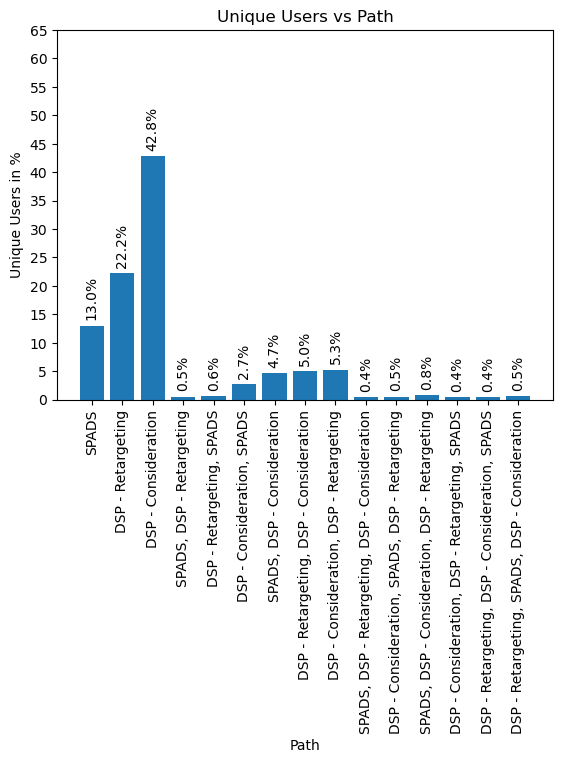

In [434]:
visual_data("path_occurrences",'Unique Users')

**Observations**
    
   - We can analyze from the above plot that most out of complete marketing campaign we were able to reach unique users with the help of DSP-Considerations with 42.8%.
   - We can see that only single length statergy i.e 1 is useful for reaching more number of unique users.

## impressions

**impressions :** Total impressions each path received over the campaign period.

In [327]:
data['impressions']

0     18255347
1     10555499
9     12423487
2      1768306
6      1332091
7      5959807
8     12921244
11     7390056
13     6107957
3      2933564
4      3606681
5      7373470
10     1780028
12     1870423
14     3131860
Name: impressions, dtype: int64

In [328]:
data['impressions'].describe()

count    1.500000e+01
mean     6.493988e+06
std      5.058217e+06
min      1.332091e+06
25%      2.401994e+06
50%      5.959807e+06
75%      8.972778e+06
max      1.825535e+07
Name: impressions, dtype: float64

No issues found for this features.

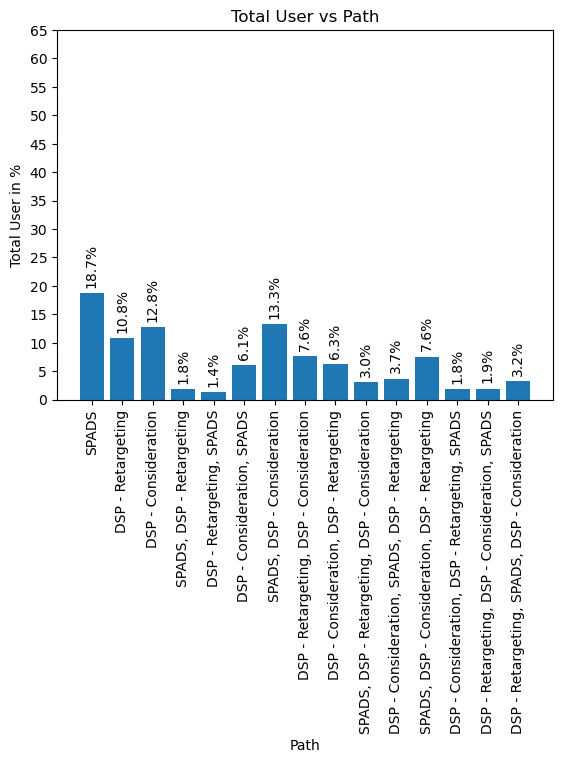

In [414]:
visual_data('impressions','Total User')

**Observations**
    
   - For generating large number of impressions we have taken the help of SPADS,DSP-Considerations,DSP-Retargeting. 
       - SPAD -> thats true we want to target new customers.
       - similarly for DSP-Retargeting and DSP-Consideration as we want to conculde our sale by again targeting or letting the customer reconsider the product.
  
   - SPADS,DSP-Considerations has generated 2nd highest impressions. Whether the sales took place or not because of this is to be checked further. 

## Total Cost

**Total_Cost** : Total cost of advertising, based on how they were purchased. 

   - **DSP** campaign are charged on a cost per thousand impressions (CPM)
   - **SPADS** are charged on cost per click (CPC). Sponsored Display campaigns have two billing strategies
                Cost per click(CPC) and cost per thousand viewable impressions(vCPM)

In [329]:
data['total_cost']

0     26869.540000
1      9717.444184
9     60045.007183
2      5185.577176
6      2994.002516
7     10665.099760
8     17628.268071
11    12304.633218
13    28169.574469
3      8610.371408
4     11708.551044
5     21234.354413
10     5268.682952
12     4829.431008
14     7905.706321
Name: total_cost, dtype: float64

In [330]:
# round the values to 3 decimal places
data['total_cost'] = np.round(data['total_cost'],2)

In [331]:
data['total_cost'].describe()

count       15.000000
mean     15542.415333
std      14587.900879
min       2994.000000
25%       6587.195000
50%      10665.100000
75%      19431.310000
max      60045.010000
Name: total_cost, dtype: float64

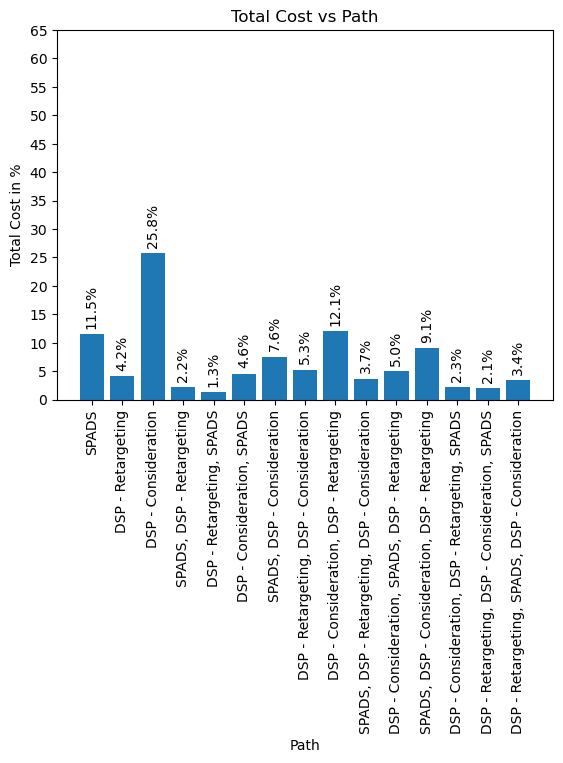

In [415]:
visual_data('total_cost','Total Cost')

**Observations**
   
   - DSP -Considerations spend was highest followed by DSP-Consideration,DSP-Retargeting.
   - This was followed by SPADS.

## users_that_purchased

**users_that_purchased :** Number of unique users who made a purchase. 

In [332]:
data['users_that_purchased']

0     573
1      81
9      52
2      54
6     120
7      98
8     109
11     25
13     24
3      63
4      60
5      94
10     64
12     66
14     72
Name: users_that_purchased, dtype: int64

In [333]:
data['users_that_purchased'].describe()

count     15.000000
mean     103.666667
std      132.674503
min       24.000000
25%       57.000000
50%       66.000000
75%       96.000000
max      573.000000
Name: users_that_purchased, dtype: float64

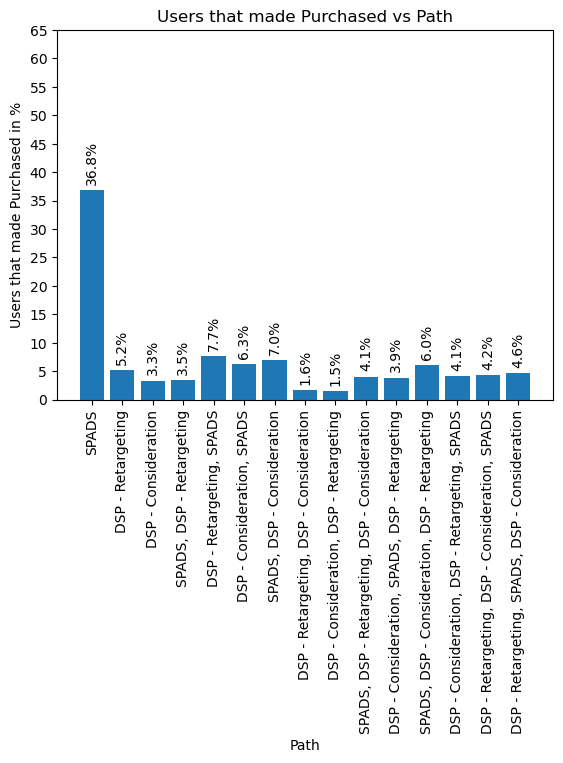

In [416]:
visual_data('users_that_purchased', 'Users that made Purchased')

**Observations**
    
   - Highest number of user that made purchases are from SPAD (check for total cost vs the sales amount for this Strategy)
   - Whereas the conversions for the all other strategy were similar with DSP-Retargeting,DSP-Considerations showing weak performance for conversion in a sales.

## sales_amount

**sales_amount :** Sales (in local currency) on Amazon after exposed to an ad. For DSP, only ASIN sales are factored in, but for Sponsored Ads, ASIN and Brand Halo sales are factored in. Advertisers may choose to include Brand Halo DSP sales by following instructions in "converted" cte.

In [334]:
data['sales_amount'] 

0     29948,8
1     4275,88
9     2760,21
2     2920,61
6     6106,19
7      5571,1
8     5931,91
11    1335,54
13     1236,8
3     3523,63
4      3105,4
5     5199,08
10    3331,31
12    3425,27
14    3929,65
Name: sales_amount, dtype: object

Converting the datatype from string to int

In [335]:
# converting the datatype to int
data['sales_amount'] = pd.to_numeric(data['sales_amount'].apply(lambda x: ".".join(re.split(',',x))),errors = 'coerce')

In [336]:
data['sales_amount'].describe()

count       15.000000
mean      5506.758667
std       6921.407771
min       1236.800000
25%       3013.005000
50%       3523.630000
75%       5385.090000
max      29948.800000
Name: sales_amount, dtype: float64

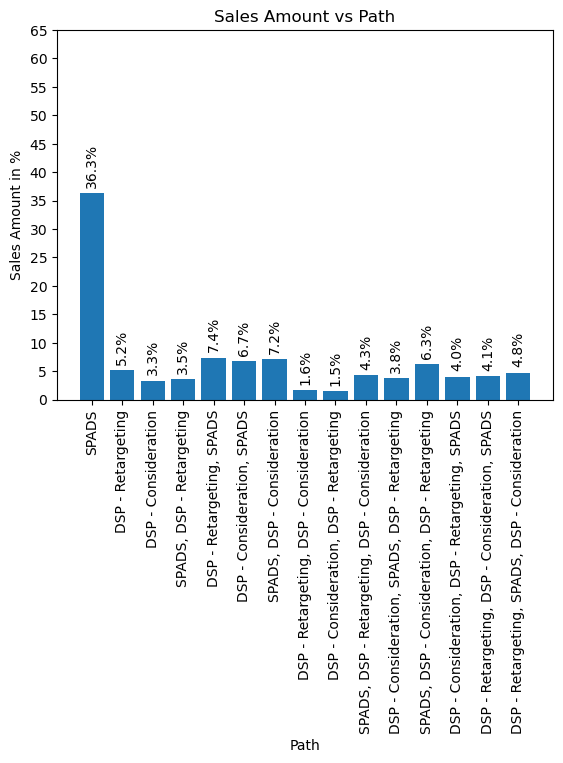

In [417]:
visual_data('sales_amount',"Sales Amount")

## purchases

**purchases :** Purchases by customers on Amazon after exposed to an ad. For DSP, only ASIN purchases are factored in, but for Sponsored Ads, ASIN and Brand Halo purchases are factored in. Advertisers may choose to include Brand Halo DSP purchases by following instructions in "converted" cte.

In [337]:
data_1['purchases']

0     577
1      83
2      55
3      67
4      61
5      99
6     121
7     102
8     112
9      53
10     65
11     26
12     67
13     24
14     73
Name: purchases, dtype: int64

According to the definition for this feature, there is no way to cross verfiy the values as "converted" cte is not present with this. Though there is issue of these values to be slighlty higher by 1-2 values compared to users_that_purchased, which reflect that this might be multiple purchases by the customer, this is different from the unit being purchased by the customer. 

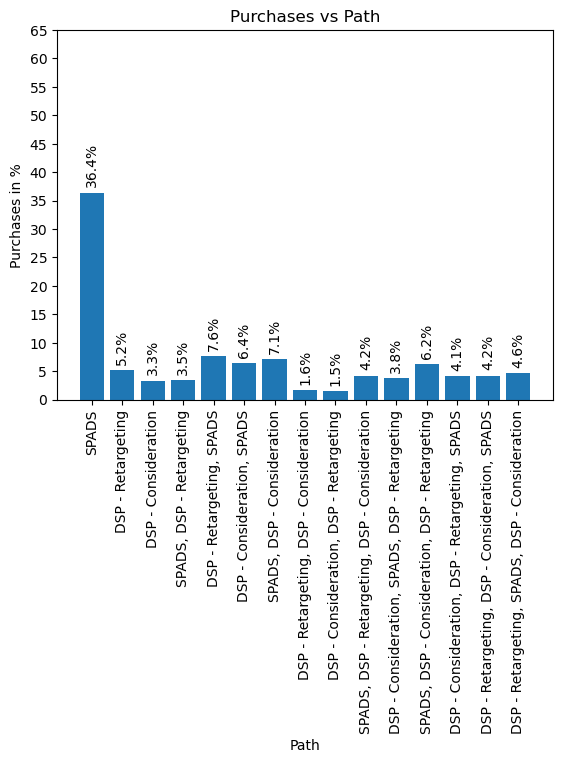

In [418]:
visual_data('purchases','Purchases')

## user_purchase_rate

**user_purchase_rate :** Number of distinct users that purchased divided by all users reached by the ad.

In [338]:
data['user_purchase_rate']

0     0.000341
1     0.000028
9     0.000009
2     0.000785
6     0.001587
7     0.000283
8     0.000179
11    0.000039
13    0.000035
3     0.001220
4     0.000889
5     0.000877
10    0.001227
12    0.001278
14    0.001019
Name: user_purchase_rate, dtype: float64

Now these values are not correct, we can either move them by 2 decimal points (multiplying by 100) or recacluate using the definition provided for accurate values

In [339]:
data_1['user_purchase_rate'] = (data_1['users_that_purchased']/data_1['path_occurrences'])*100

In [340]:
data_1['user_purchase_rate']

0     0.034138
1     0.002822
2     0.078542
3     0.121972
4     0.088856
5     0.087687
6     0.158713
7     0.028294
8     0.017938
9     0.000941
10    0.122730
11    0.003861
12    0.127818
13    0.003528
14    0.101879
Name: user_purchase_rate, dtype: float64

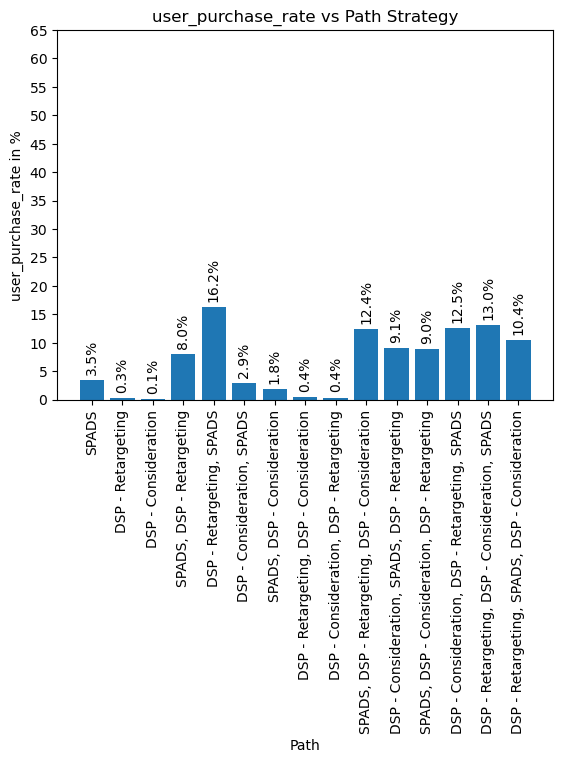

In [437]:
visual_data('user_purchase_rate','user_purchase_rate')

## ntb_users_that_purchased	

**ntb_users_that_purchased :** Number of distinct users who made a New-To-Brand purchase

In [341]:
data['ntb_users_that_purchased']

0     438
1      30
9      45
2      27
6      40
7      70
8      96
11      9
13     13
3      36
4      42
5      65
10     34
12     31
14     31
Name: ntb_users_that_purchased, dtype: int64

In [342]:
# checking if the nth_users_that_purchased greater than users_that_purchased
data[data['ntb_users_that_purchased']>data['users_that_purchased']]

,path,first_touch,middle_touch,last_touch,path_length,path_occurrences,impressions,total_cost,users_that_purchased,sales_amount,purchases,user_purchase_rate,ntb_users_that_purchased,ntb_sales_amount,ntb_purchases,total_units_sold,ntb_percentage


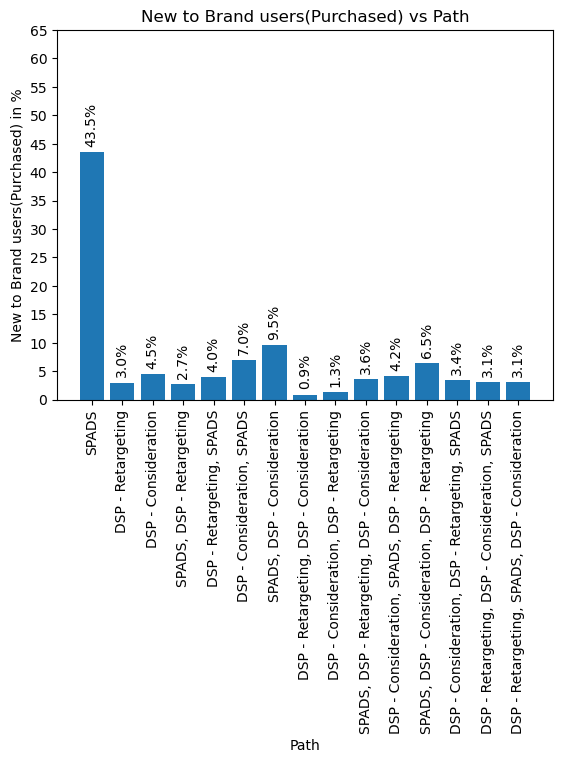

In [419]:
visual_data('ntb_users_that_purchased','New to Brand users(Purchased)')

#  ntb_sales_amount

**ntb_sales_amount :** New-to-Brand sales (in local currency) on Amazon after exposed to an ad. For DSP, only ASIN sales are factored in, but for Sponsored Ads, ASIN and Brand Halo sales are factored in. Advertisers may choose to include new-to-brand Brand Halo DSP sales by following instructions in "converted" cte.


In [343]:
data['ntb_sales_amount']

0     22907.54
1      1598.73
9      2412.83
2      1400.63
6      1980.80
7      3822.71
8      5118.03
11      494.07
13      669.91
3      1930.15
4      2225.41
5      3485.95
10     1720.34
12     1571.49
14     1652.40
Name: ntb_sales_amount, dtype: float64

In [344]:
data[data['ntb_sales_amount']>data['sales_amount']]

,path,first_touch,middle_touch,last_touch,path_length,path_occurrences,impressions,total_cost,users_that_purchased,sales_amount,purchases,user_purchase_rate,ntb_users_that_purchased,ntb_sales_amount,ntb_purchases,total_units_sold,ntb_percentage


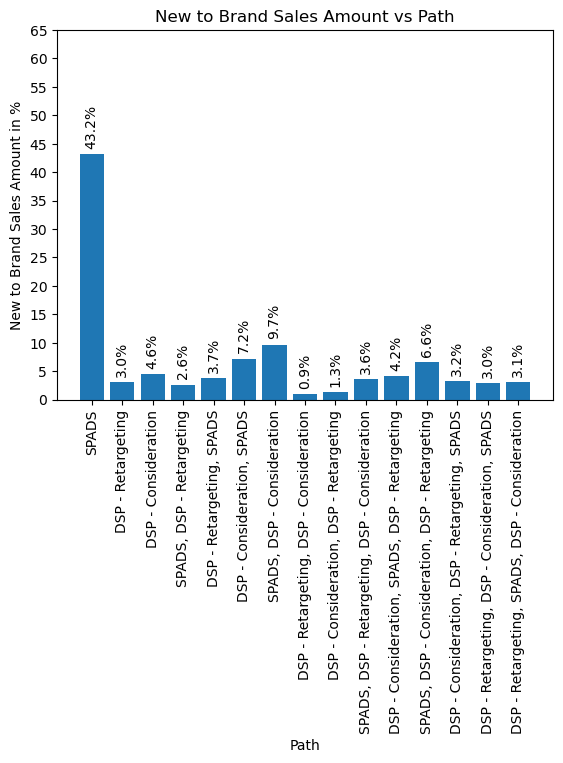

In [420]:
visual_data('ntb_sales_amount','New to Brand Sales Amount')

## ntb_purchases	

**ntb_purchases :** New-to-Brand purchases by customers on Amazon after exposed to an ad. For DSP, only ASIN purchases are factored in, but for Sponsored Ads, ASIN and Brand Halo purchases are factored in. Advertisers may choose to include new-to-brand Brand Halo DSP purchases by following instructions in "converted" cte.


In [345]:
data['ntb_purchases']

0     439
1      30
9      45
2      27
6      40
7      71
8      96
11      9
13     13
3      36
4      43
5      66
10     34
12     31
14     31
Name: ntb_purchases, dtype: int64

In [346]:
data[data['ntb_purchases']>data['purchases']]

,path,first_touch,middle_touch,last_touch,path_length,path_occurrences,impressions,total_cost,users_that_purchased,sales_amount,purchases,user_purchase_rate,ntb_users_that_purchased,ntb_sales_amount,ntb_purchases,total_units_sold,ntb_percentage


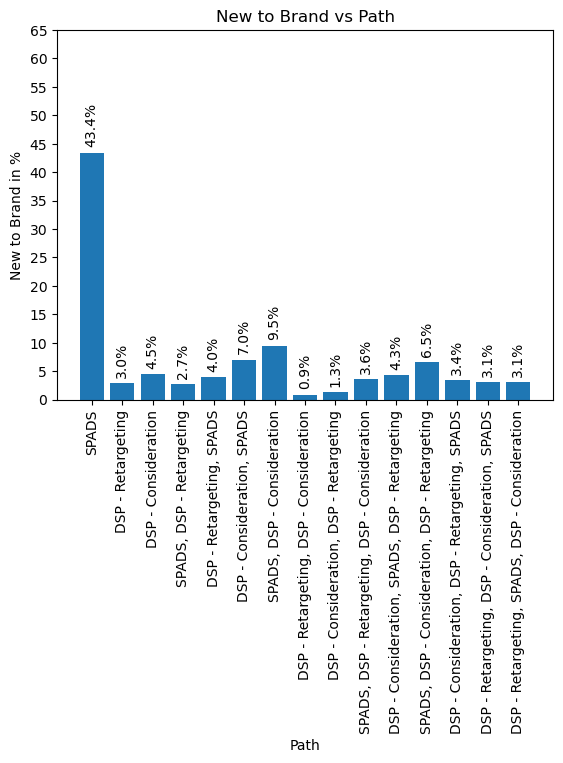

In [421]:
visual_data('ntb_purchases','New to Brand')

## total_units_sold

**total_units_sold :** No definition provided for this feature.

In [347]:
data['total_units_sold']

0     587
1      85
9      54
2      56
6     123
7     103
8     112
11     26
13     25
3      68
4      62
5     100
10     65
12     69
14     74
Name: total_units_sold, dtype: int64

As there is no definition provided we can just compare **total_units_sold** with the **purchases** and **ntb_users_that_purchased** visually.

In [348]:
# checking whether total_units_sold is larger than purchases and ntb_users_that_purchased
data[['total_units_sold','purchases','ntb_users_that_purchased']]

,total_units_sold,purchases,ntb_users_that_purchased
0,587,577,438
1,85,83,30
9,54,53,45
2,56,55,27
6,123,121,40
7,103,102,70
8,112,112,96
11,26,26,9
13,25,24,13
3,68,67,36


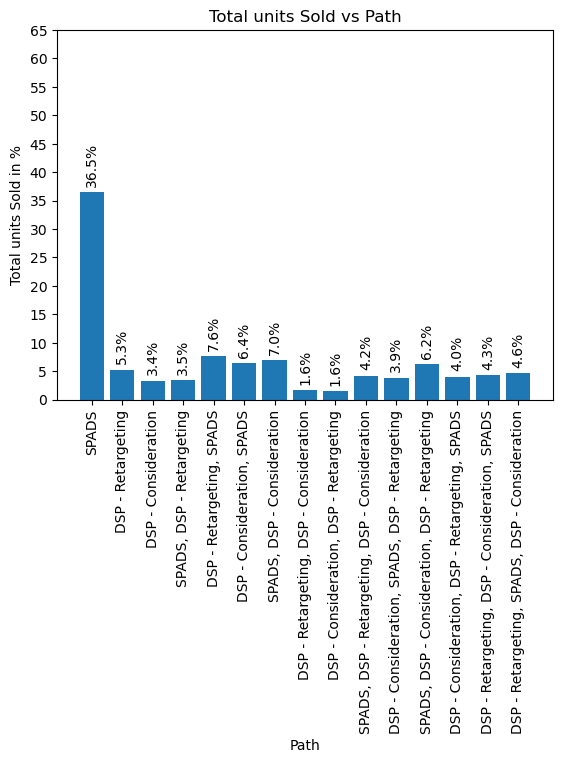

In [422]:
visual_data('total_units_sold','Total units Sold')

## ntb_percentage

**ntb_percentage :** Mostly this feature is referring to **ntb_users_percentage** in the definition.

Converting this column name to **ntb_users_percentage**

In [349]:
data['ntb_percentage']

0     0.764398
1     0.370370
9     0.865385
2     0.500000
6     0.333333
7     0.714286
8     0.880734
11    0.360000
13    0.541667
3     0.571429
4     0.700000
5     0.691489
10    0.531250
12    0.469697
14    0.430556
Name: ntb_percentage, dtype: float64

In [350]:
# cross checking for error
data['ntb_users_that_purchased']/data['users_that_purchased']

0     0.764398
1     0.370370
9     0.865385
2     0.500000
6     0.333333
7     0.714286
8     0.880734
11    0.360000
13    0.541667
3     0.571429
4     0.700000
5     0.691489
10    0.531250
12    0.469697
14    0.430556
dtype: float64

In [351]:
# renaming the column as provided in the definitions
data.rename(columns={'ntb_percentage': 'ntb_users_percentage'}, inplace=True)

# multiplying by 100 
data['ntb_users_percentage'] = np.round(data['ntb_users_percentage']*100,2)

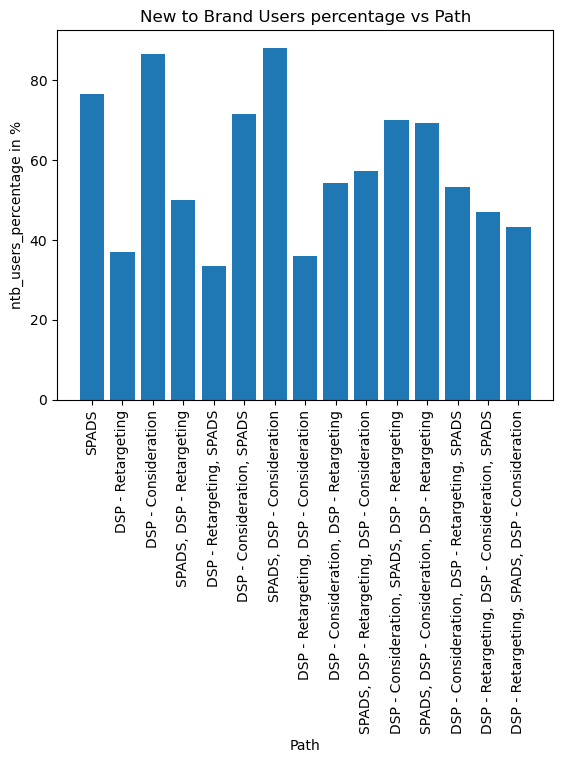

In [427]:
plt.bar(x = data['path'], height = data['ntb_users_percentage'])
plt.xticks(rotation = 90)
plt.title(f'New to Brand Users percentage vs Path')
plt.ylabel(f'ntb_users_percentage in %')
plt.xlabel('Path')
plt.show()

## ntb_purchases_percentage

**ntb_purchases_percentage :** Percentage (%) of New-To-Brand purchases (i.e. ntb_purchases / purchases)

This feature is not present hence adding it to the data.




In [352]:
data['ntb_purchases_percentage'] = (data['ntb_purchases']/data['purchases'])*100

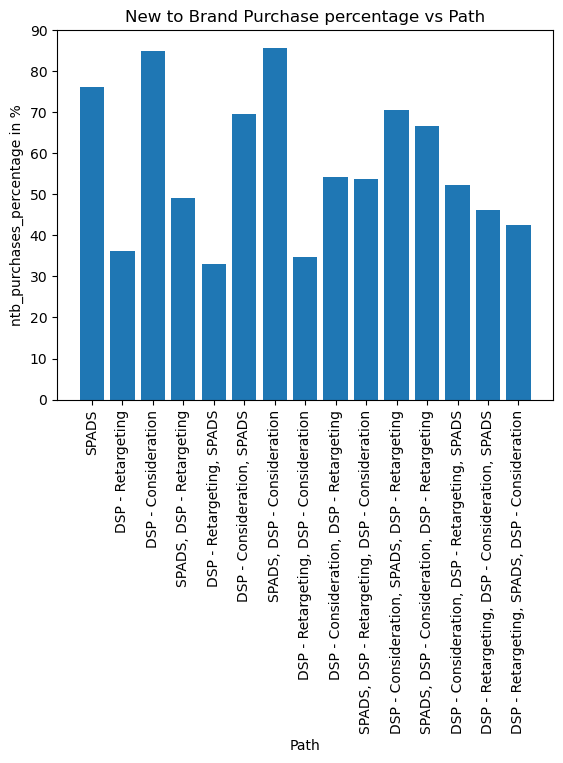

In [429]:
plt.bar(x = data['path'], height = data['ntb_purchases_percentage'])
plt.xticks(rotation = 90)
plt.title(f'New to Brand Purchase percentage vs Path')
plt.ylabel(f'ntb_purchases_percentage in %')
plt.xlabel('Path')
plt.show()

# Strategic Quesitons for Business stake holders

**Questions** Which strategy to target most no. of users for the product

C:\Users\Piyush\AppData\Local\Temp\ipykernel_3788\1823973930.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(data['path'], rotation=90)
C:\Users\Piyush\AppData\Local\Temp\ipykernel_3788\1823973930.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(data['path'], rotation=90)


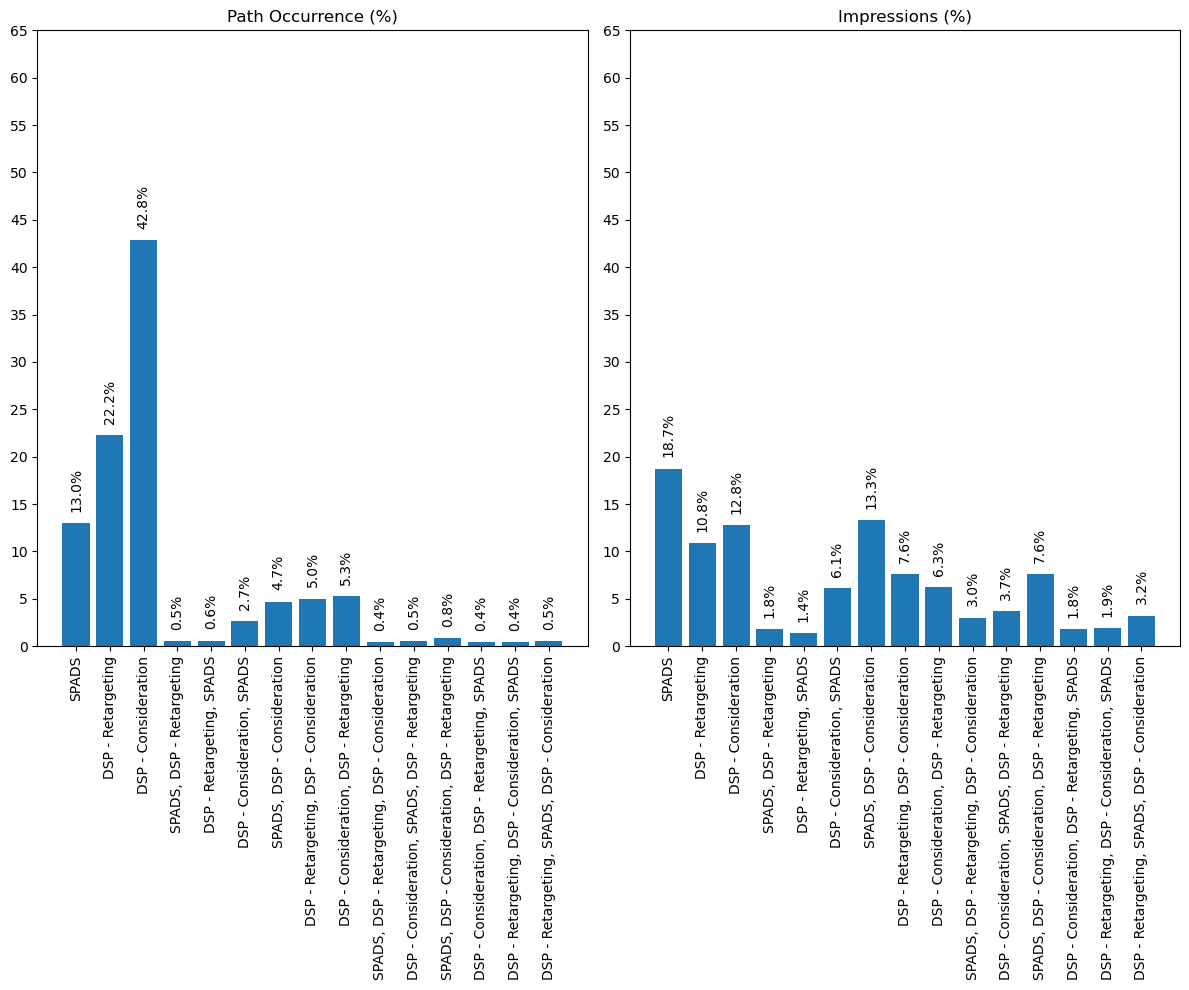

In [456]:
fig,axs = plt.subplots(1,2,figsize = (12,10))

data_path_occurance = (data['path_occurrences']/data['path_occurrences'].sum())*100
data_path_impressions = (data['impressions']/data['impressions'].sum())*100
axs[0].bar(x = data['path'], height = data_path_occurance )
axs[0].set_title("Path Occurrence (%)")
axs[0].set_yticks(np.arange(0,70,5))
axs[0].set_xticklabels(data['path'], rotation=90)
for i, v in enumerate(data_path_occurance):
    axs[0].text(i, v + 1.5, f"{v:.1f}%", ha='center', rotation='vertical')



axs[1].bar(x = data['path'], height = data_path_impressions )
axs[1].set_title("Impressions (%)")
axs[1].set_yticks(np.arange(0,70,5))
axs[1].set_xticklabels(data['path'], rotation=90)
for i, v in enumerate(data_path_impressions):
    axs[1].text(i, v + 1.5, f"{v:.1f}%", ha='center', rotation='vertical')

plt.tight_layout()
plt.show()


**Observations**

   - In the ad-campaigns DSP-Consideration has the most number of unique users targets followed by DSP-Retargeting and SPADS
   - SPADS (18.7%) followed by SPADS,DSP-Considerations(13.3%) generated most number of impressions for the ad campaign followed by DSP Retargeting and DSP-Considerations for the conversions. 
   - There was heavy push for DSP- Consideration for the conversion of the sales.

-------------------------------------------------------------------------------------------------------------------

**Questions** Cost compared to the unique users reached.

C:\Users\Piyush\AppData\Local\Temp\ipykernel_3788\1023214924.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(data['path'], rotation=90)
C:\Users\Piyush\AppData\Local\Temp\ipykernel_3788\1023214924.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(data['path'], rotation=90)


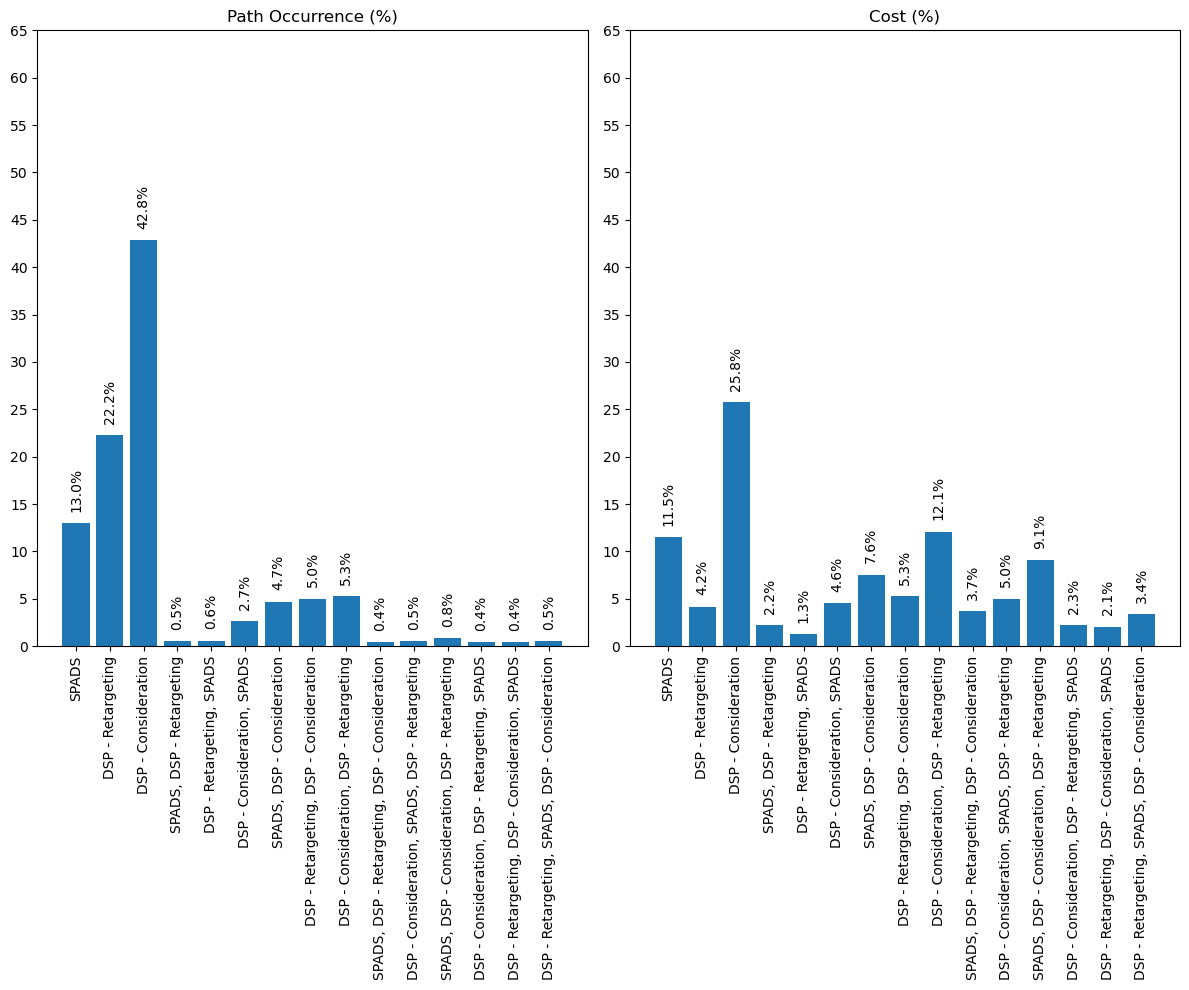

In [457]:
fig,axs = plt.subplots(1,2,figsize = (12,10))

data_path_occurance = (data['path_occurrences']/data['path_occurrences'].sum())*100
data_path_total_cost = (data['total_cost']/data['total_cost'].sum())*100
axs[0].bar(x = data['path'], height = data_path_occurance )
axs[0].set_title("Path Occurrence (%)")
axs[0].set_yticks(np.arange(0,70,5))
axs[0].set_xticklabels(data['path'], rotation=90)
for i, v in enumerate(data_path_occurance):
    axs[0].text(i, v + 1.5, f"{v:.1f}%", ha='center', rotation='vertical')



axs[1].bar(x = data['path'], height = data_path_total_cost )
axs[1].set_title("Cost (%)")
axs[1].set_yticks(np.arange(0,70,5))
axs[1].set_xticklabels(data['path'], rotation=90)
for i, v in enumerate(data_path_total_cost):
    axs[1].text(i, v + 1.5, f"{v:.1f}%", ha='center', rotation='vertical')

plt.tight_layout()
plt.show()

**Observations**
    
   - Cost for DSP-Consideration is high and considerably we got higher number of unique users during the ad campaign.
   - Cost of SPADS and DSP-Consederation,DSP-Retargeting was considerablly high compared to the unique users. This is due to they were very user specific and depending on the type of the customer being targeted.

-------------------------------------------------------------------------------------------------------------------

**Questions** What was the exfficient way i.e cost on the ad to the new user reach.

C:\Users\Piyush\AppData\Local\Temp\ipykernel_3788\1801531032.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(data['path'], rotation=90)
C:\Users\Piyush\AppData\Local\Temp\ipykernel_3788\1801531032.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(data['path'], rotation=90)


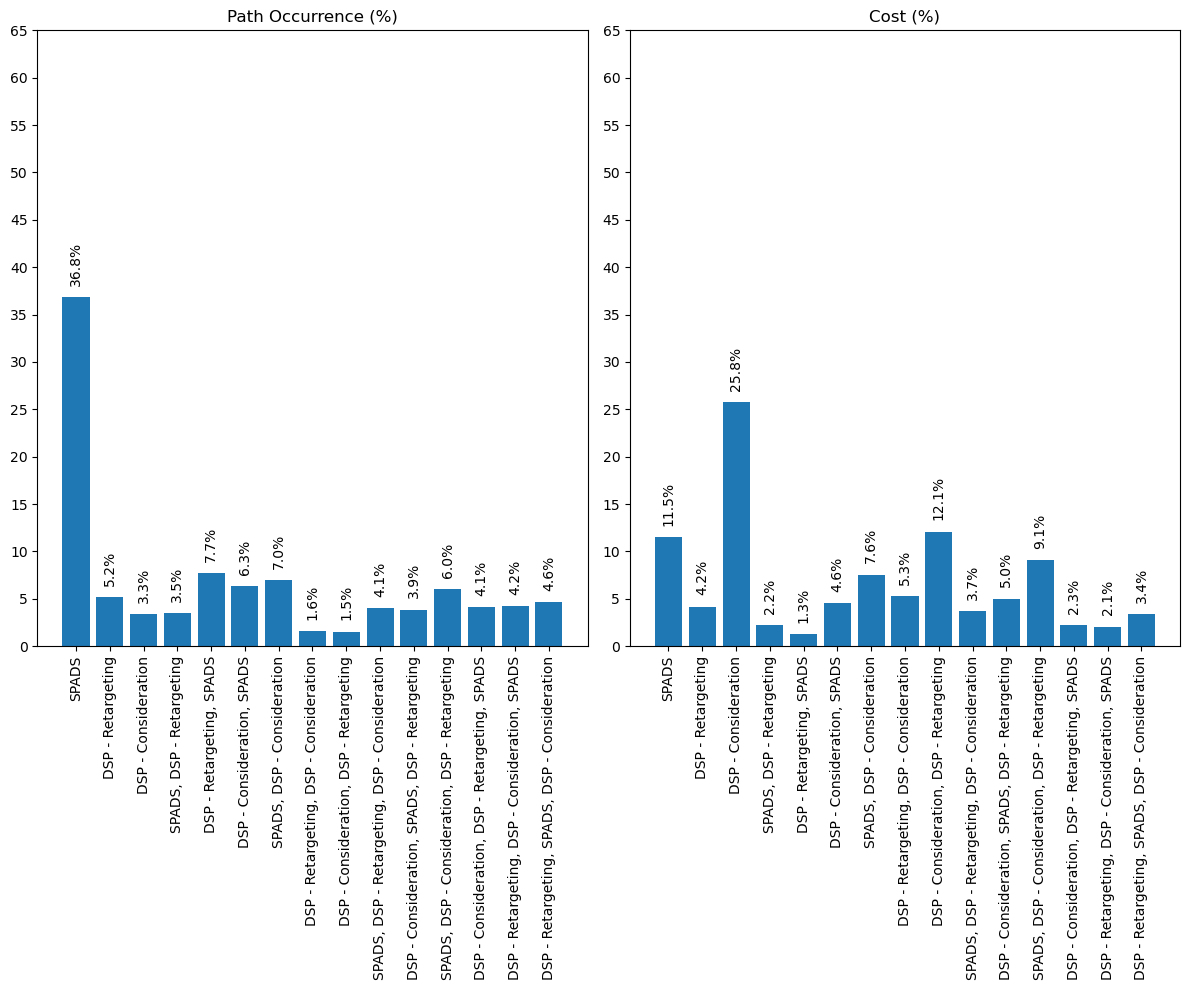

In [458]:
fig,axs = plt.subplots(1,2,figsize = (12,10))

data_path_user_that_purchased = (data['users_that_purchased']/data['users_that_purchased'].sum())*100
data_path_total_cost = (data['total_cost']/data['total_cost'].sum())*100
axs[0].bar(x = data['path'], height = data_path_user_that_purchased )
axs[0].set_title("Path Occurrence (%)")
axs[0].set_yticks(np.arange(0,70,5))
axs[0].set_xticklabels(data['path'], rotation=90)
for i, v in enumerate(data_path_user_that_purchased):
    axs[0].text(i, v + 1.5, f"{v:.1f}%", ha='center', rotation='vertical')



axs[1].bar(x = data['path'], height = data_path_total_cost )
axs[1].set_title("Cost (%)")
axs[1].set_yticks(np.arange(0,70,5))
axs[1].set_xticklabels(data['path'], rotation=90)
for i, v in enumerate(data_path_total_cost):
    axs[1].text(i, v + 1.5, f"{v:.1f}%", ha='center', rotation='vertical')

plt.tight_layout()
plt.show()

**Observations** 

   - The most effective way to get new sales was SPAD as the cost spend was 11.5% whereas the 36.8% more users were converted. 
   - Whereas DSP-Consideration, DSP-Retargeting was least effective for new sales generations.

---------------------------------------------------------------------------------------------------------

**Questions**: Which strategy was most effective to find New to brand users.

C:\Users\Piyush\AppData\Local\Temp\ipykernel_3788\3406116917.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(data['path'], rotation=90)
C:\Users\Piyush\AppData\Local\Temp\ipykernel_3788\3406116917.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(data['path'], rotation=90)


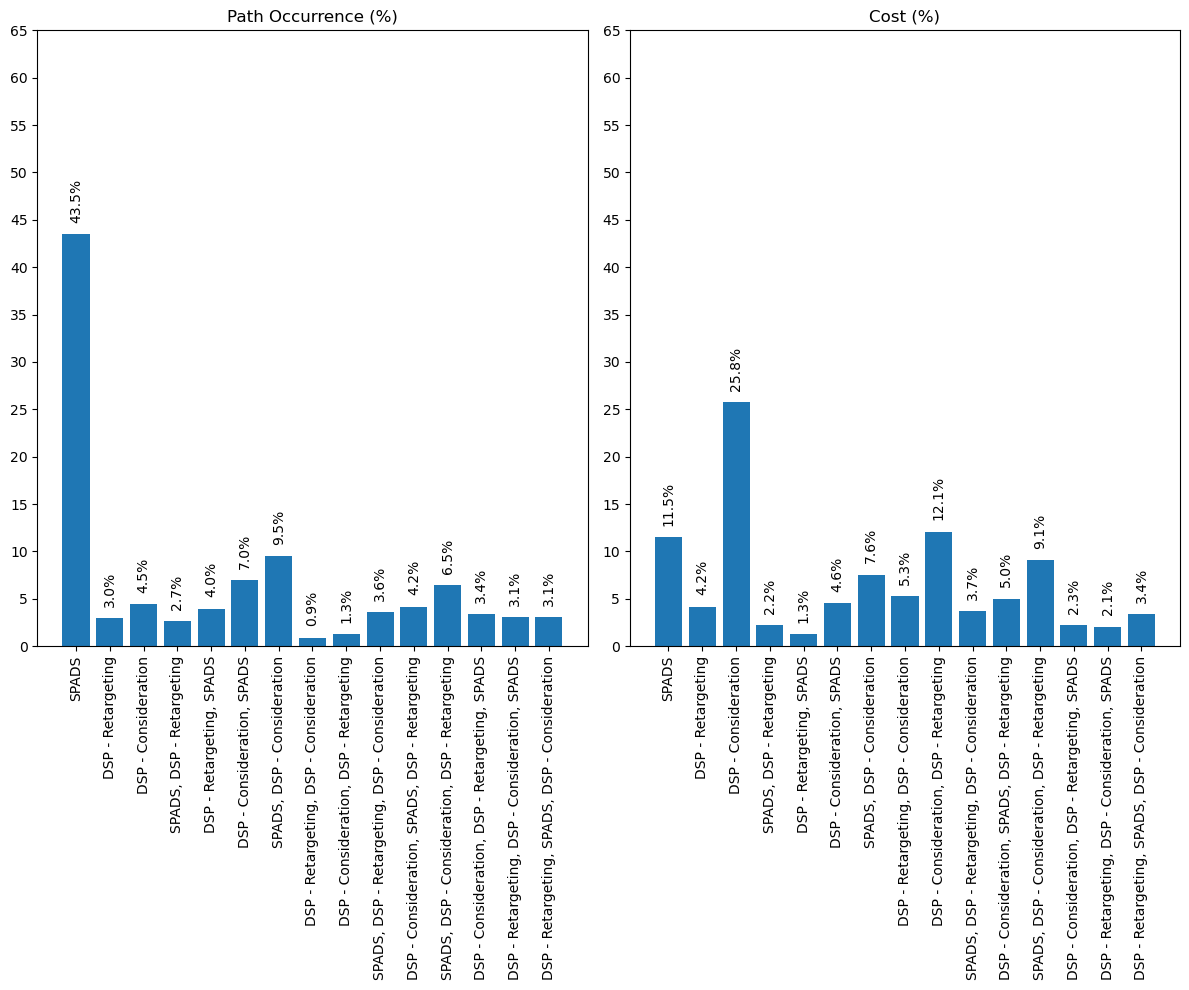

In [474]:
fig,axs = plt.subplots(1,2,figsize = (12,10))

data_path_ntb_users_that_purchased = (data['ntb_users_that_purchased']/data['ntb_users_that_purchased'].sum())*100
data_path_total_cost = (data['total_cost']/data['total_cost'].sum())*100
axs[0].bar(x = data['path'], height = data_path_ntb_users_that_purchased )
axs[0].set_title("Path Occurrence (%)")
axs[0].set_yticks(np.arange(0,70,5))
axs[0].set_xticklabels(data['path'], rotation=90)
for i, v in enumerate(data_path_ntb_users_that_purchased):
    axs[0].text(i, v + 1.5, f"{v:.1f}%", ha='center', rotation='vertical')



axs[1].bar(x = data['path'], height = data_path_total_cost )
axs[1].set_title("Cost (%)")
axs[1].set_yticks(np.arange(0,70,5))
axs[1].set_xticklabels(data['path'], rotation=90)
for i, v in enumerate(data_path_total_cost):
    axs[1].text(i, v + 1.5, f"{v:.1f}%", ha='center', rotation='vertical')

plt.tight_layout()
plt.show()

**Observations**
    
    - SPADS was most effective to reach users that were new to the brand and they made a purchased.
    - DSP-Considerations was least effective the ad-campaign.

-----------------------------------------------------------------------------------------------------------------------

**Question** Which strategy was effective in recovering the cost.  

To know this we will have to know of what percentage of the total cost on the ad campaign we were able to recover through the sales. 

We get this in the form of percentage as shown below.

In [467]:
# calculating sales to total cost to find the percentage of cost revovery
data['sales_to_total_cost'] = (data['sales_amount']/data['total_cost'])*100

# view this 
data[['path','sales_to_total_cost']]

,path,sales_to_total_cost
0,SPADS,111.460040
1,DSP - Retargeting,44.002124
9,DSP - Consideration,4.596902
2,"SPADS, DSP - Retargeting",56.321762
6,"DSP - Retargeting, SPADS",203.947562
7,"DSP - Consideration, SPADS",52.236735
8,"SPADS, DSP - Consideration",33.649984
11,"DSP - Retargeting, DSP - Consideration",10.853963
13,"DSP - Consideration, DSP - Retargeting",4.390553
3,"SPADS, DSP - Retargeting, DSP - Consideration",40.923096


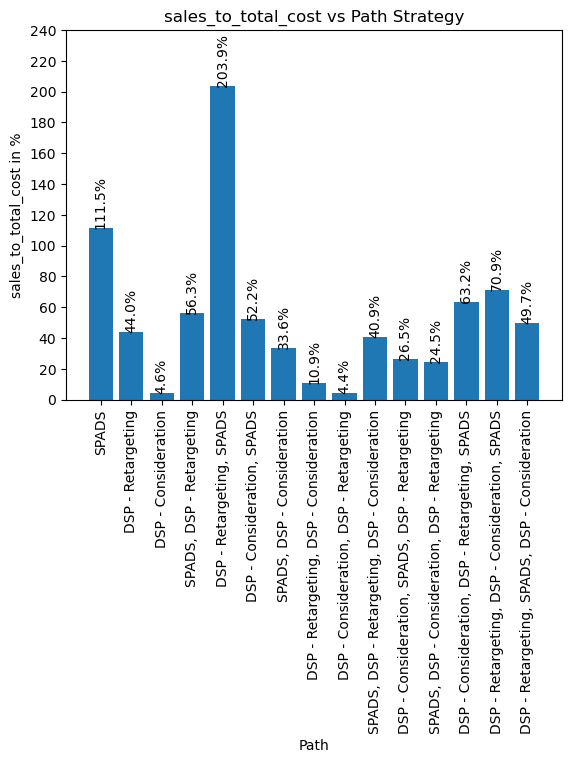

In [470]:
plt.bar(x = data['path'], height = data['sales_to_total_cost'])
    
for i, v in enumerate(data['sales_to_total_cost']):
    plt.text(i, v + 1.5, f"{v:.1f}%", ha='center',rotation = 'vertical')
    
plt.yticks(np.arange(0,250,20))
plt.xticks(rotation = 90)
plt.title(f'sales_to_total_cost vs Path Strategy')
plt.ylabel(f'sales_to_total_cost in %')
plt.xlabel('Path')
plt.show()

Comparing this cost recovery to the spending on ad campaign side by side.

C:\Users\Piyush\AppData\Local\Temp\ipykernel_3788\649879660.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(data['path'], rotation=90)
C:\Users\Piyush\AppData\Local\Temp\ipykernel_3788\649879660.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(data['path'], rotation=90)


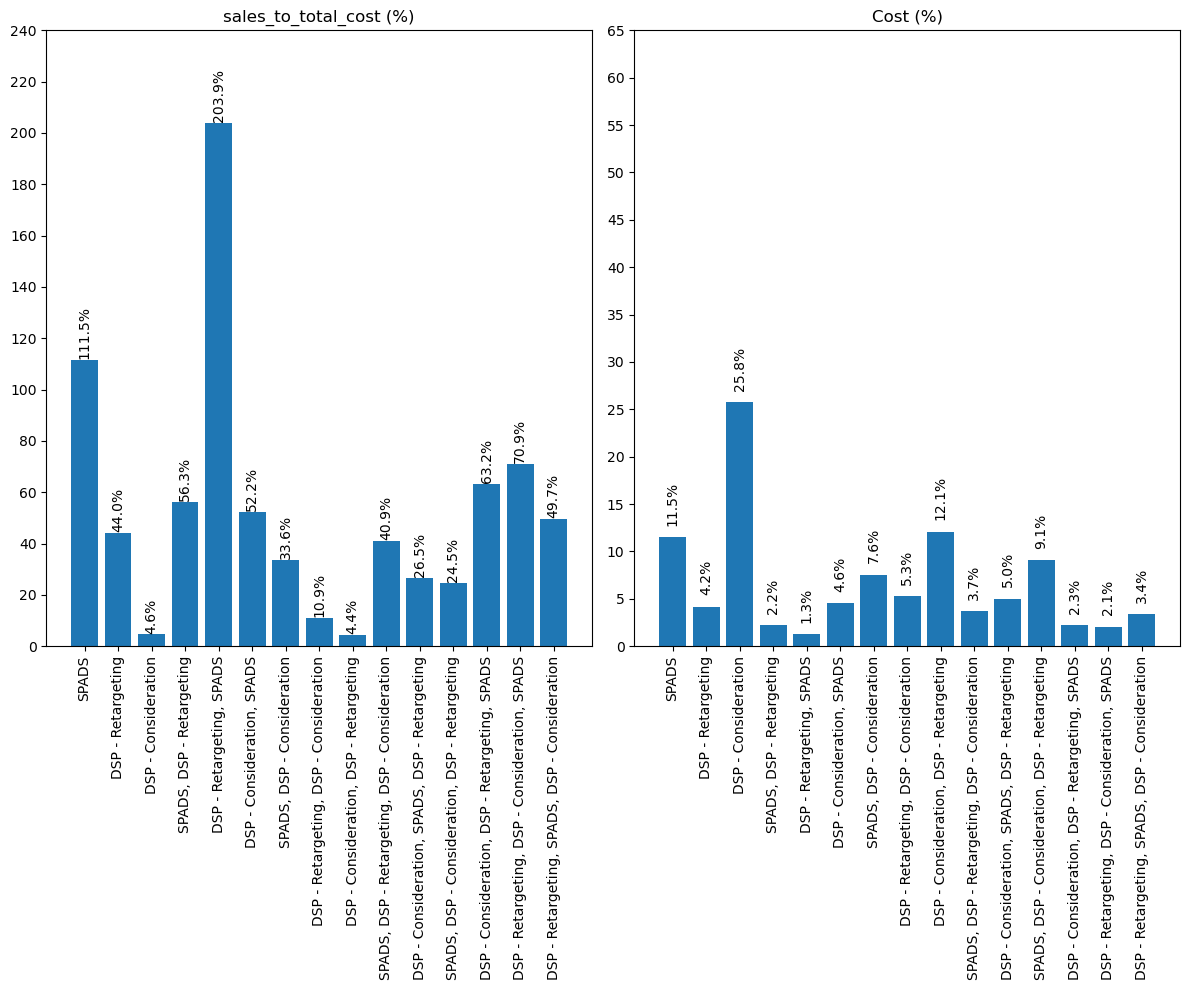

In [472]:
fig,axs = plt.subplots(1,2,figsize = (12,10))


data_path_total_cost = (data['total_cost']/data['total_cost'].sum())*100
axs[0].bar(x = data['path'], height = data['sales_to_total_cost'] )
axs[0].set_title("sales_to_total_cost (%)")
axs[0].set_yticks(np.arange(0,250,20))
axs[0].set_xticklabels(data['path'], rotation=90)
for i, v in enumerate(data['sales_to_total_cost']):
    axs[0].text(i, v + 1.5, f"{v:.1f}%", ha='center', rotation='vertical')



axs[1].bar(x = data['path'], height = data_path_total_cost )
axs[1].set_title("Cost (%)")
axs[1].set_yticks(np.arange(0,70,5))
axs[1].set_xticklabels(data['path'], rotation=90)
for i, v in enumerate(data_path_total_cost):
    axs[1].text(i, v + 1.5, f"{v:.1f}%", ha='center', rotation='vertical')

plt.tight_layout()
plt.show()

**Observations**

    - We can see that (DSP_Retargeting,SPADS) strategy had the least amount of spending allocated but the return was 203% and similarly we were able to revocer 100% of the spending on SPADS campaign.
    - Though spending pn DSP-Consideration was high, conversion into sales was very less. 

-------------------------------------------------------------------------------------------------------------------

## Conclusion

1. Campaign using the DSP-Consideration Strategy as less effective as there were less user being reached and even the cost for this strategy was not recovered.

2. Campaign was most effective to run SPADS ad campaign as it resulted in higher reach to unique users and conversion to sales too. 

